<a href="https://colab.research.google.com/github/RohanDeo18/SmartKnower-ML-DS/blob/master/Minor_Project_Predict_Rain_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset used: Rain in Australia (Predict rain tomorrow in Australia)



This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

Hence, it can be described as a Binary Classification problem: RainTomorrow (Yes/No?).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
print('Size of df :',df.shape)

Size of df : (142193, 24)


In [4]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  ...  RainToday  RISK_MM  RainTomorrow
0       2008-12-01   Albury     13.4  ...         No      0.0            No
1       2008-12-02   Albury      7.4  ...         No      0.0            No
2       2008-12-03   Albury     12.9  ...         No      0.0            No
3       2008-12-04   Albury      9.2  ...         No      1.0            No
4       2008-12-05   Albury     17.5  ...         No      0.2            No
...            ...      ...      ...  ...        ...      ...           ...
142188  2017-06-20    Uluru      3.5  ...         No      0.0            No
142189  2017-06-21    Uluru      2.8  ...         No      0.0            No
142190  2017-06-22    Uluru      3.6  ...         No      0.0            No
142191  2017-06-23    Uluru      5.4  ...         No      0.0            No
142192  2017-06-24    Uluru      7.8  ...         No      0.0            No

[142193 rows x 24 columns]>

In [5]:
# To check null values:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
# We need to drop RISK_MM because we want to predict 'Rain Tomorrow' and RISK_MM can leak some info to our model
# Also, we will drop the following columns:
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM'],axis=1)
df.shape
# Location is dropped because the location is Australia, not a specific location

(142193, 18)

In [7]:
# To handle the null data
df.dropna(axis=0, subset=['Rainfall'], inplace=True)
df.fillna(method='ffill', inplace=True)

In [8]:
# To convert yes and no to 1 and 0
df.RainTomorrow.replace({'No':0, 'Yes':1}, inplace=True)
df.RainToday.replace({'No':0, 'Yes':1}, inplace=True)

In [9]:
df['RainTomorrow'].isnull().sum()

0

In [10]:
df['RainTomorrow'].nunique()

2

In [11]:
s = df['RainTomorrow'].value_counts()
print(s)

0    109586
1     31201
Name: RainTomorrow, dtype: int64


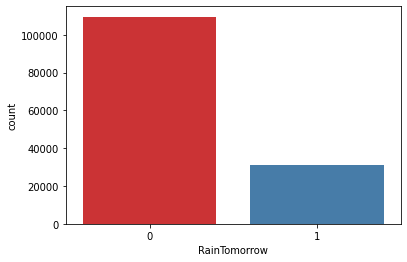

In [12]:
graph = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    140787 non-null  object 
 5   WindGustSpeed  140787 non-null  float64
 6   WindDir9am     140787 non-null  object 
 7   WindDir3pm     140787 non-null  object 
 8   WindSpeed9am   140787 non-null  float64
 9   WindSpeed3pm   140787 non-null  float64
 10  Humidity9am    140787 non-null  float64
 11  Humidity3pm    140787 non-null  float64
 12  Pressure9am    140787 non-null  float64
 13  Pressure3pm    140787 non-null  float64
 14  Temp9am        140787 non-null  float64
 15  Temp3pm        140787 non-null  float64
 16  RainToday      140787 non-null  int64  
 17  RainTomorrow   140787 non-nul

In [14]:
obj_cols = df.select_dtypes("object")
obj_cols

,Date,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,W,W,WNW
1,2008-12-02,WNW,NNW,WSW
2,2008-12-03,WSW,W,WSW
3,2008-12-04,NE,SE,E
4,2008-12-05,W,ENE,NW
...,...,...,...,...
142188,2017-06-20,E,ESE,E
142189,2017-06-21,E,SE,ENE
142190,2017-06-22,NNW,SE,N
142191,2017-06-23,N,SE,WNW


In [15]:
obj_cols = df.select_dtypes("object")


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in obj_cols.columns:
    df[col] = le.fit_transform(df[col])

In [16]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,397,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,398,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,399,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,400,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [19]:
x = df.iloc[:,1:17].values
y = df['RainTomorrow'].values

In [20]:
# K-Nearest Neighbours
t0 = time.time()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
t1 = time.time()
print('y_pred: ', y_pred)
print('y_test: ',y_test)
print('Accuracy :',acc*100)
print('Time taken :' ,t1-t0)

y_pred:  [0 0 0 ... 0 1 0]
y_test:  [0 1 0 ... 0 1 0]
Accuracy : 83.57837914624618
Time taken : 32.47005891799927


In [21]:
print(classification_report(y_test, y_pred, target_names=['Wont Rain', 'Will Rain'])) 

              precision    recall  f1-score   support

   Wont Rain       0.86      0.94      0.90     21897
   Will Rain       0.68      0.49      0.57      6261

    accuracy                           0.84     28158
   macro avg       0.77      0.71      0.73     28158
weighted avg       0.82      0.84      0.83     28158



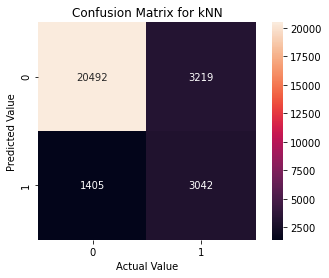

In [22]:
# Confusion matrix for kNN 
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.title('Confusion Matrix for kNN')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');
plt.show()

In [25]:
# Random Forest Classifier
t2 = time.time()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_2 = RandomForestClassifier()
model_2.fit(x_train, y_train)
y_pred2 = model_2.predict(x_test)
acc2 = accuracy_score(y_test, y_pred2)
t3 = time.time()
print('Accuracy :',acc*100)
print('Time taken :' ,t3-t2)
print(classification_report(y_test, y_pred2, target_names=['Wont Rain', 'Will Rain'])) 

Accuracy : 83.57837914624618
Time taken : 31.62593102455139
              precision    recall  f1-score   support

   Wont Rain       0.87      0.95      0.91     21897
   Will Rain       0.75      0.48      0.59      6261

    accuracy                           0.85     28158
   macro avg       0.81      0.72      0.75     28158
weighted avg       0.84      0.85      0.84     28158



In [26]:
# Decision Tree
t4 = time.time()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_3 = DecisionTreeClassifier()
model_3.fit(x_train, y_train)
y_pred3 = model_3.predict(x_test)
acc3 = accuracy_score(y_test, y_pred3)
t5 = time.time()
print('Accuracy :',acc*100)
print('Time taken :' ,t5-t4)
print(classification_report(y_test, y_pred3, target_names=['Wont Rain', 'Will Rain'])) 

Accuracy : 83.57837914624618
Time taken : 1.7196786403656006
              precision    recall  f1-score   support

   Wont Rain       0.86      0.85      0.86     21897
   Will Rain       0.50      0.51      0.51      6261

    accuracy                           0.78     28158
   macro avg       0.68      0.68      0.68     28158
weighted avg       0.78      0.78      0.78     28158



** Conclusion: **
1. All of the above 3 methods give the same accuracy for the dataset. 
2. The confusion matrix shows the false +ves and -ves.
3. For the three models used, the computation time taken by each is:- 32.47s for kNN, 31.62s for Random Forest and 1.719s for Decision Tree. Hence, **Decision Tree is the fastest** and is the preferred model for the given dataset. 

In [27]:
# ----------------End of Project--------------------